<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Expectation_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Expectation&ndash;Maximization

In statistics, an expectation–maximization (EM) algorithm is an iterative method to find (local) maximum likelihood or maximum a posteriori (MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables. The EM iteration alternates between performing an expectation (E) step, which creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters, and a maximization (M) step, which computes parameters maximizing the expected log-likelihood found on the E step. These parameter-estimates are then used to determine the distribution of the latent variables in the next E step.
> Source: [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## 1-D Mixture Gaussian model

Let's say we have a set of points that come from 2 different gaussian distributions. 

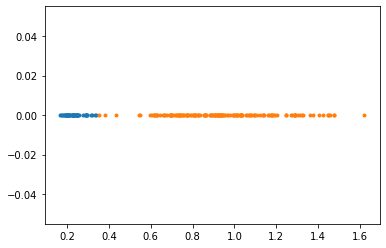

In [18]:
n1 = 50 # samples1
n2 = 150 # samples2
mu1, sig1, mu2, sig2 = 0.25,0.05,1,0.25
samples1 = np.random.normal(mu1, sig1, n1)
samples2 = np.random.normal(mu2, sig2, n2)
plt.scatter(samples1,np.zeros(len(samples1)), marker='.'); 
plt.scatter(samples2,np.zeros(len(samples2)), marker='.');


Estimation is trivial if we know which point came from which source/distribution. For the blue points we can compute the mean and variance. Likewise for the orange points.

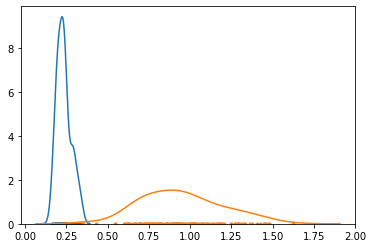

In [19]:
plt.scatter(samples1,np.zeros(len(samples1)), marker='.'); 
plt.scatter(samples2,np.zeros(len(samples2)), marker='.');
sns.distplot(samples1, hist=False)
sns.distplot(samples2, hist=False) 

What if we don't know which point came from which source?

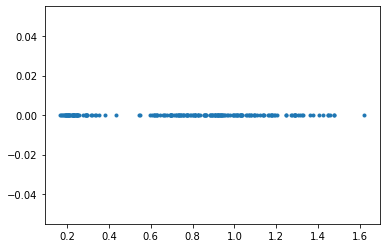

In [20]:
samples = np.append(samples1, samples2)
plt.scatter(samples,np.zeros(len(samples)), marker='.'); 

We have a bunch of data points that came from *k* different Gaussian distributions. But we don't know which data point came from which source. We also do not know the parameters ($\mu,\sigma$) of those *k* Gaussian distributions.

This is the problem addressed by the Expectation&ndash;Maximization algorithm.

In [21]:
def plot(X,u1,s1,u2,s2,title):
  """ Plot mean and sigma at each step along with original data points."""
  plt.figure(figsize=(15,4))
  plt.title(title)
  plt.scatter(X,np.zeros(len(X)), marker='.')
  ax = sns.kdeplot(X, color='gray',linestyle=':')
  ymin, ymax = ax.get_ylim()
  plt.vlines(u1,ymin,ymax,'r','-.')
  plt.text(u1,ymax,'$\mu_1$')
  plt.vlines(u1-s1,ymin,ymax,'r','--')
  plt.text(u1-s1,ymax*0.8,'$-\sigma_1$')
  plt.vlines(u1+s1,ymin,ymax,'r','--')
  plt.text(u1+s1,ymax*0.9,'$+\sigma_1$')
  plt.vlines(u2,ymin,ymax,'b','-.')
  plt.text(u2,ymax,'$\mu_2$')
  plt.vlines(u2-s2,ymin,ymax,'b','--')
  plt.text(u2-s2,ymax*.8,'$-\sigma_2$')
  plt.vlines(u2+s2,ymin,ymax,'b','--')
  plt.text(u2+s2,ymax*.9,'$+\sigma_2$')
  plt.show()

## Expectation&ndash;Maximization Algorithm



* Start with 2 randomly placed Gaussians ($\mu_1, \sigma_1$) and ($\mu_2, \sigma_2$)
* Given these randomly placed Gaussians, for each point compute the probability that it belongs to each of these distributions
* Re-estimate ($\mu_1, \sigma_1$) and ($\mu_2, \sigma_2$) to fit the points assigned to them
* Iterate until it converges


Compute probability of a data point given that it belongs to one distribution

$P(x_i|dist_1) = \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{(x_i-\mu_1)^2}{2\sigma_1^2}}$

Compute probability of a distribution given the data point

$P(dist_1|x_i) = \frac{P(x_i|dist_1)P(dist_1)}{P(x_i|dist_1)P(dist_1) + P(x_i|dist_2)P(dist_2)}$


$P(dist_2|x_i) = 1 - P(dist_1|x_i)$


Re-estimate $\mu$ and $\sigma$ to fit the points assigned to them

$\mu_1 = \frac{\displaystyle\sum_{i=1}^{n} P(dist_1|x_i).x_i}{\displaystyle\sum_{i=1}^{n} P(dist_1|x_i)}$

$\sigma_1 = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} P(dist_1|x_i)(x_i-\mu_1)^2}{\displaystyle\sum_{i=1}^{n} P(dist_1|x_i)}}$


Repeat until $\mu$ and $\sigma$ converge.

Following code performs these steps and plots the $\mu$ and $\sigma$ at each step.


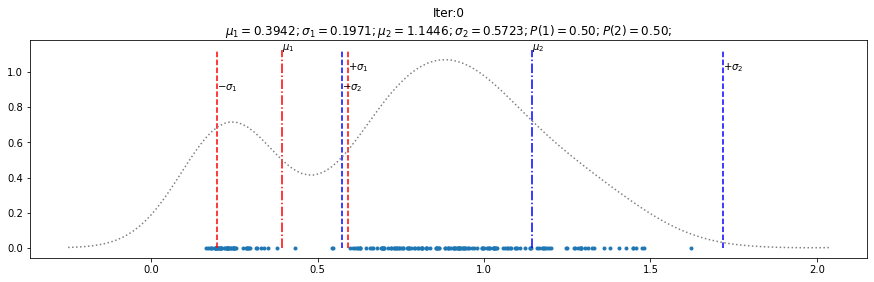

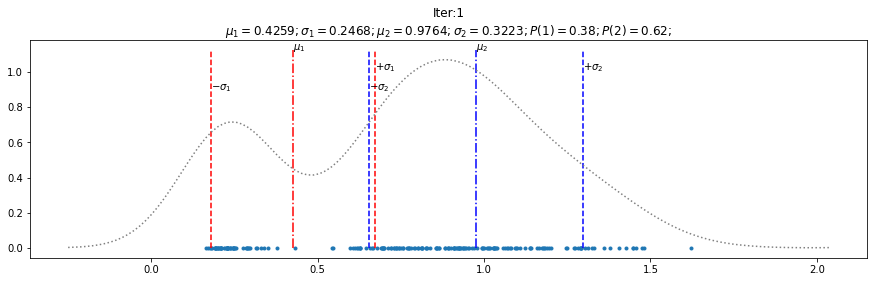

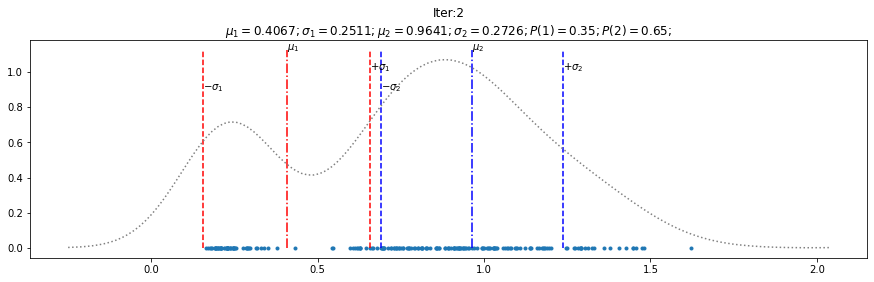

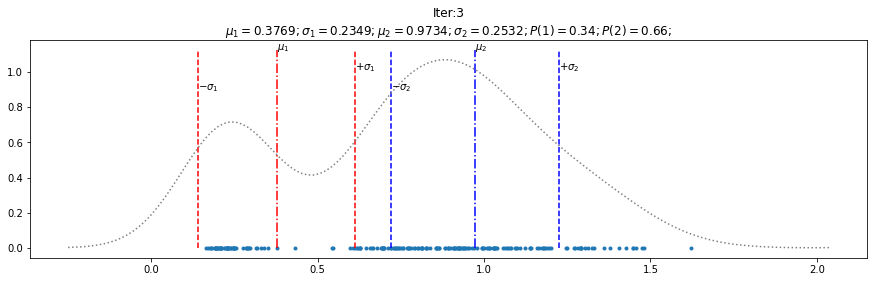

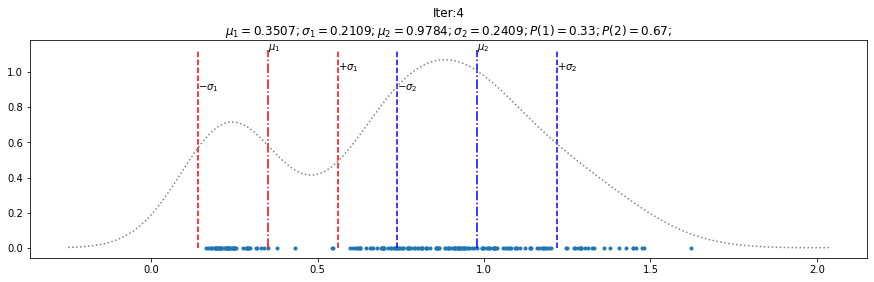

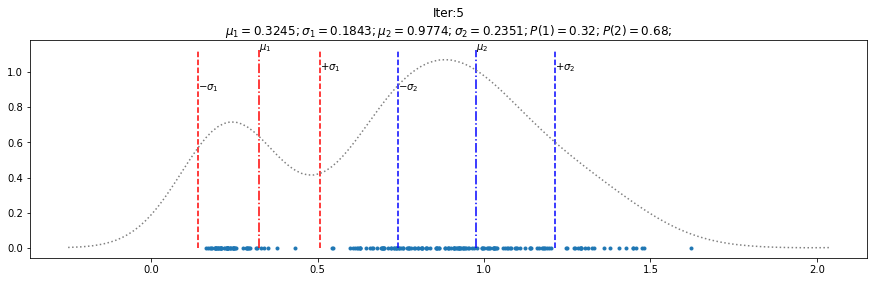

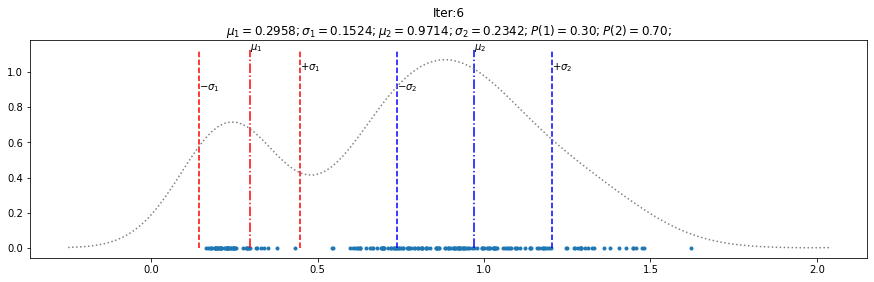

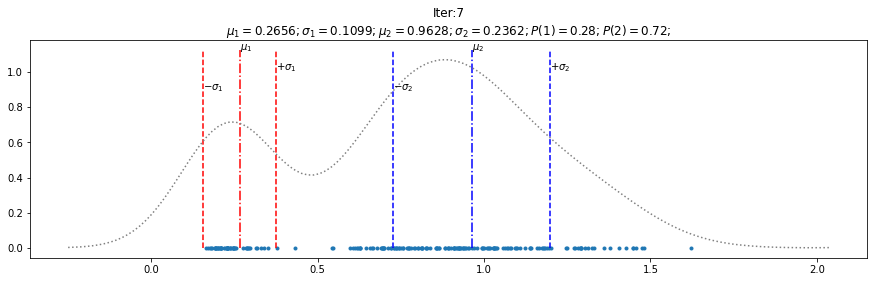

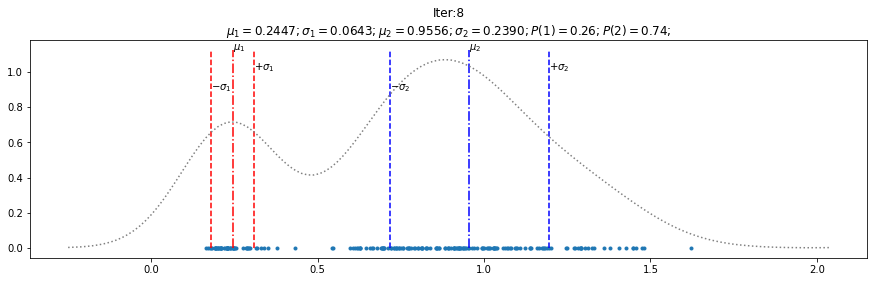

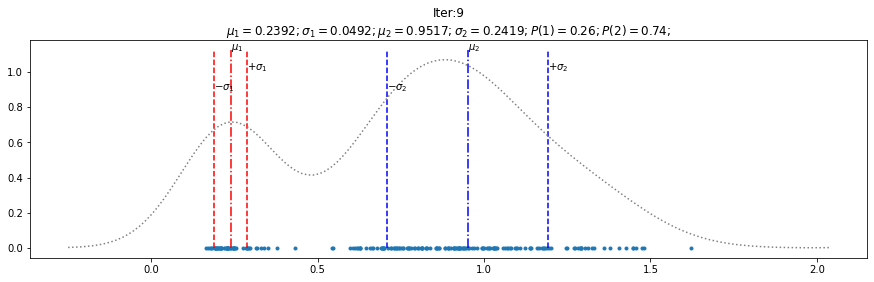

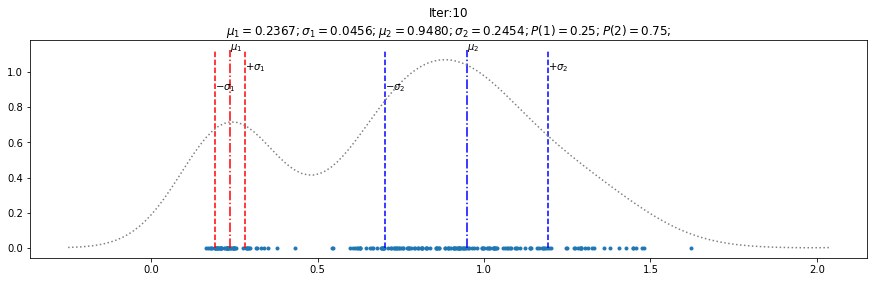

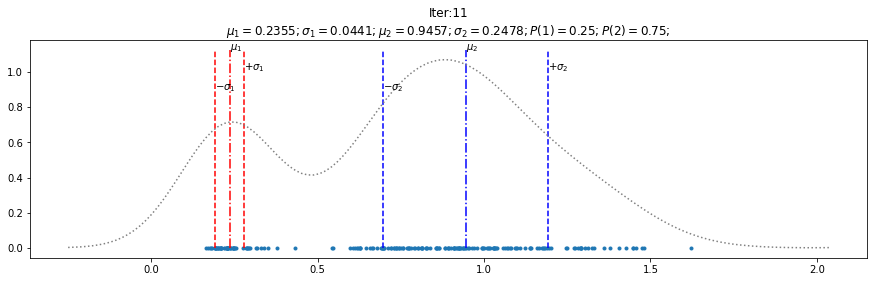

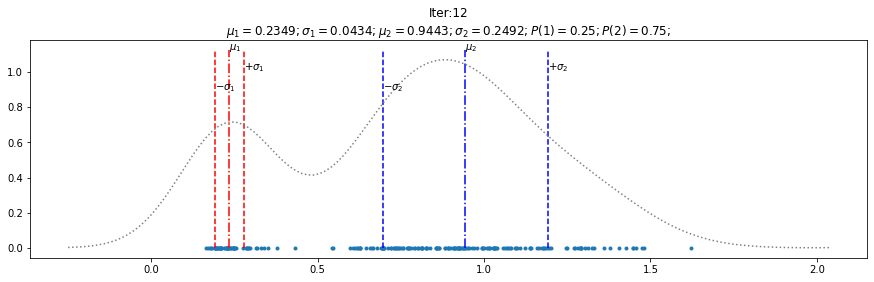

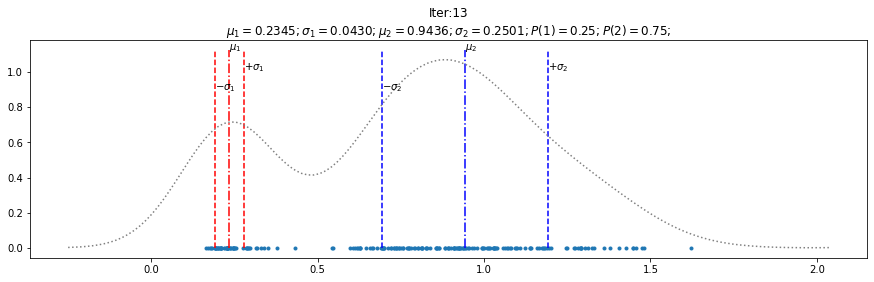

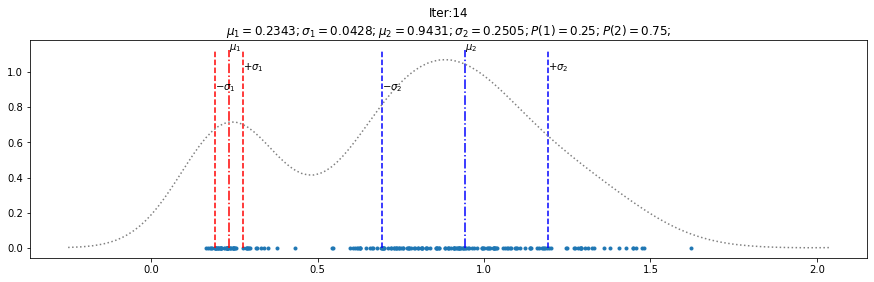

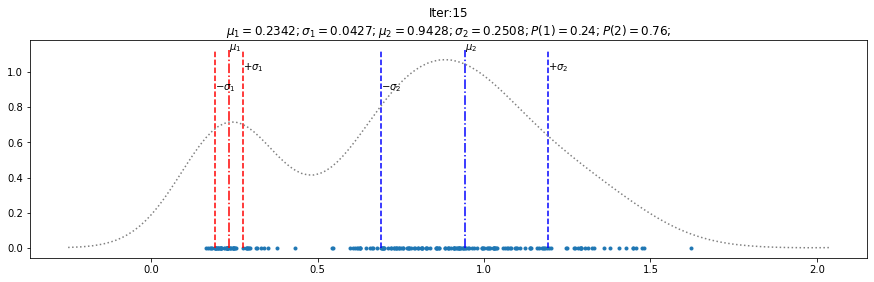

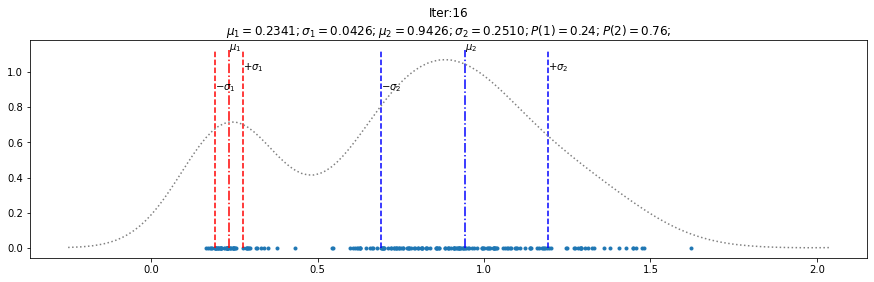

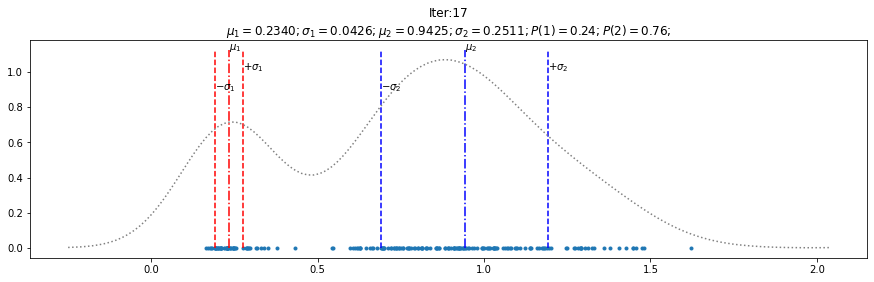

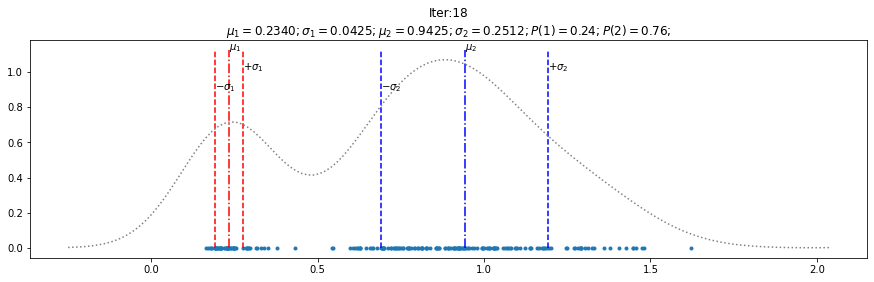

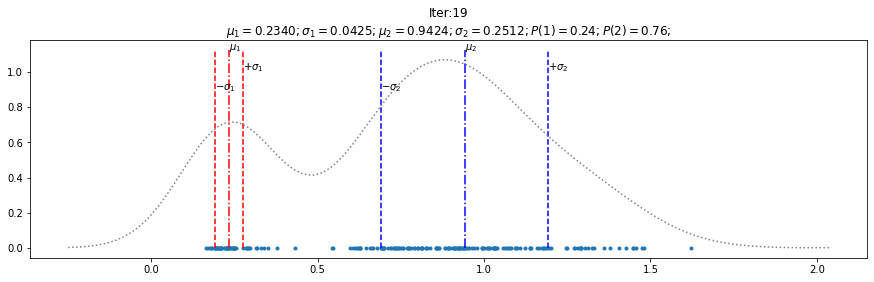

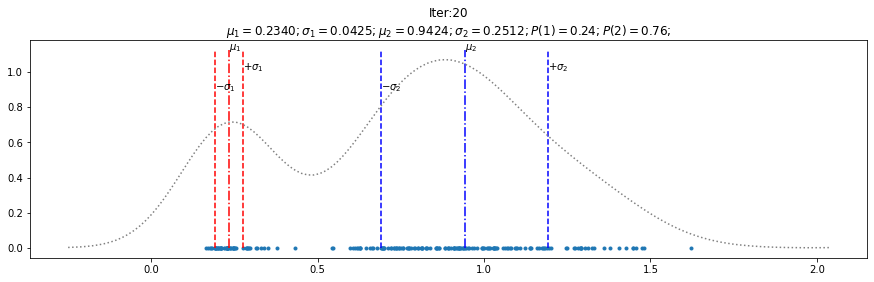

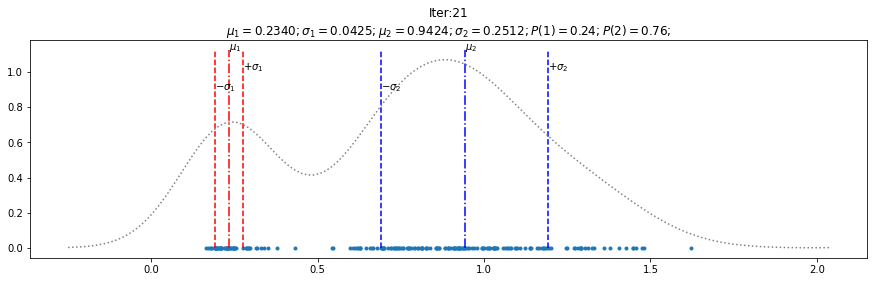

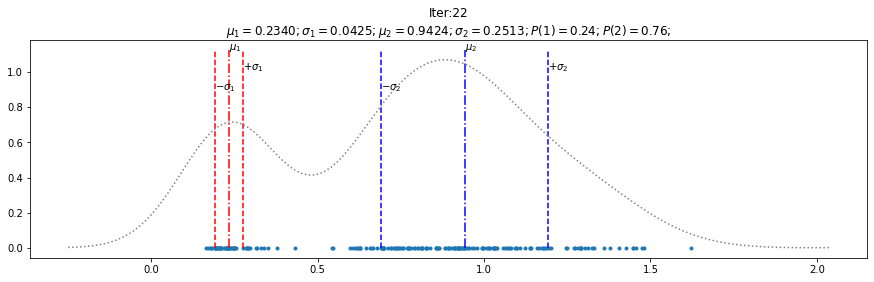

Converged


In [31]:
X = samples
u1,u2 = X.mean()-X.std(), X.mean()+X.std()#np.random.uniform(X.min(), X.max(), 2)
s1, s2 = u1*0.5, u2*0.5
p1,p2 = 0.5,0.5 # initial prob of dist1 and 2
plot(X, u1,s1, u2, s2, f"Iter:0\n$\mu_1={u1:0.4f};\sigma_1={s1:0.4f};\mu_2={u2:0.4f};\sigma_2={s2:0.4f};P(1)={p1:0.2f};P(2)={p2:0.2f};$")
for i in range(1,101):
  px_1 = (np.exp(-((X-u1)**2)/(2*(s1**2))))/np.sqrt(np.pi*2*(s1**2)) #P(x|1)
  px_2 = (np.exp(-((X-u2)**2)/(2*(s2**2))))/np.sqrt(np.pi*2*(s2**2)) #P(x|2)
  p1_x = (px_1*p1)/((px_1*p1) + (px_2*p2))
  p2_x = 1-p1_x
  p1 = np.mean(p1_x)
  p2 = np.mean(p2_x)
  u1_ = np.sum(p1_x*X)/np.sum(p1_x)
  u2_ = np.sum(p2_x*X)/np.sum(p2_x)
  s1_ = np.sqrt(np.sum(p1_x*((X-u1)**2))/np.sum(p1_x))
  s2_ = np.sqrt(np.sum(p2_x*((X-u2)**2))/np.sum(p2_x))
  plot(X, u1_,s1_, u2_, s2_, f"Iter:{i}\n$\mu_1={u1_:0.4f};\sigma_1={s1_:0.4f};\mu_2={u2_:0.4f};\sigma_2={s2_:0.4f};P(1)={p1:0.2f};P(2)={p2:0.2f};$")
  if np.allclose([u1,u2,s1,s2],[u1_,u2_,s1_,s2_], atol=1e-05):
    print("Converged")
    break
  else:
    u1,u2,s1,s2=(u1_,u2_,s1_,s2_)


Compare the estimated Gaussian parameters to the original

In [32]:
from IPython.display import display, Math
display(Math(rf"Original \space Distribution: \mu_1={mu1:0.3f};\sigma_1={sig1:0.3f};\mu_2={mu2:0.3f};\sigma_2={sig2:0.3f};P(dist_1)={n1/(n1+n2):0.2f};P(dist_2)={n2/(n1+n2):0.2f}"))
display(Math(rf"Estimated \space Distribution: \mu_1={u1:0.3f};\sigma_1={s1:0.3f};\mu_2={u2:0.3f};\sigma_2={s2:0.3f};P(dist_1)={p1:0.2f};P(dist_2)={p2:0.2f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>